### Image Pipeline

<ol>
    <li> Take a picture of your face or have a friend do it.</li>
    <li> Import the image into Jupyter Notebook. </li>
    <li> Analyze the image. </li>
    <li> Create an RGB histogram of the whole image. </li>
    <li> Modify your image with brightness and contrast so it fits the complete tonal range. </li>
    <li> Create a mask of your face. </li>
    <li> Use the mask to create a HSV histogram. </li>
    <li> Analyze the histogram for skin tone ranges. </li>
    <li> Use the HSV ranges to create a mask of skin tones. </li>
    <li> Apply the mask to the image and segment out your skin/face. </li>
<ol>

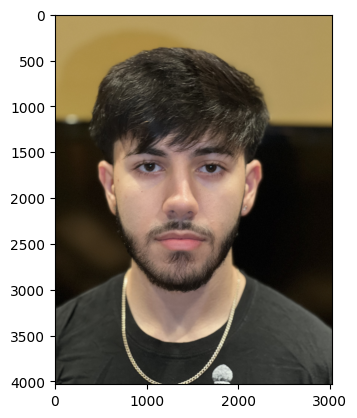

In [369]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Import the image
img = cv2.imread("Portrait.jpg", 1) # 0 for grayscale, 1 for color, -1 for color with an alpha channel

# Convert from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img)

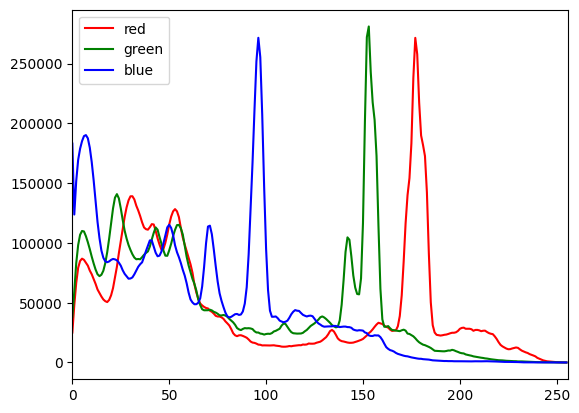

In [370]:
# Create an RGB histogram of the whole image
# First plot for the red channel
hist = cv2.calcHist([img], [0], None, [256], [0, 255])
plt.plot(hist, color = 'red')
plt.xlim([0, 256])

# Second plot for the green channel
hist = cv2.calcHist([img], [1], None, [256], [0, 255])
plt.plot(hist, color = 'green')
plt.xlim([0, 256])

# Third plot the the blue channel
hist = cv2.calcHist([img], [2], None, [256], [0, 255])
plt.plot(hist, color = 'blue')
plt.xlim([0, 256])

# Add a legend
plt.legend(('red','green','blue'), loc = 'upper left')

# Plot the histogram
plt.show()

In [371]:
# Brightness and contrast function
# Output = alpha * input + beta

def adjust_brightness_contrast(image_array, alpha, beta):
    # Convert to floating point to avoid overflow and underflow
    temp = image_array.astype('float32')

    # Adjust contrast
    temp *= alpha

    # Adjust brightness
    temp += beta

    # Clip values to be in the range [0, 255]
    temp = np.clip(temp, 0, 255)

    return temp.astype('uint8')

# Adjust the image with brightness and contrast to fit the complete tonal range
adjusted_img = adjust_brightness_contrast(img, .5, 40)

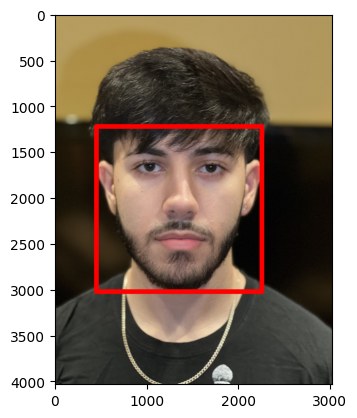

In [372]:
# Rectangle OpenCv function
# cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)

# Top left corner of the rectangle
top_left = (450, 1225) # change values depending on the picture

# Bottom right corner of the rectangle
bottom_right = (2250, 3025) # change values depending on the picture

# Color
rect_color = (255, 0, 0)

# Thickness
thickness = 50

# Rectangle function
img_rect = cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)

# Plot the image
plt.imshow(img_rect)

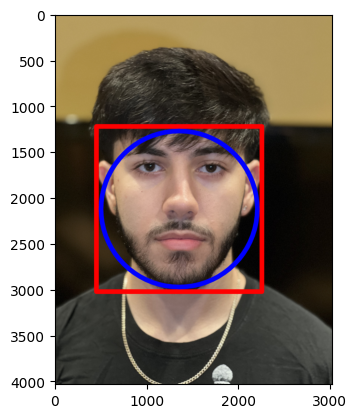

In [373]:
# Circle OpenCv function
# cv2.circle(img, center_circle, radius, circle_color, thickness)

# Center of the circle
center_circle = (1350, 2125) # change values depending on the picture

# Radius of the circle
radius = 850 # change value depending on the picture

# Color
circle_color = (0, 0, 255)

# Circle function
img_circle = cv2.circle(img, center_circle, radius, circle_color, thickness)

# Plot the image
plt.imshow(img_circle)

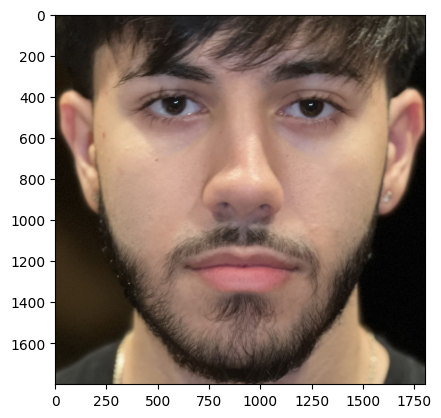

In [374]:
# Import the image again
img = cv2.imread("Portrait.jpg", 1) # 0 for grayscale, 1 for color, -1 for color with an alpha channel

# Convert from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_cropped = img[1225:3025, 450:2250]

# Display the cropped image
plt.imshow(img_cropped)

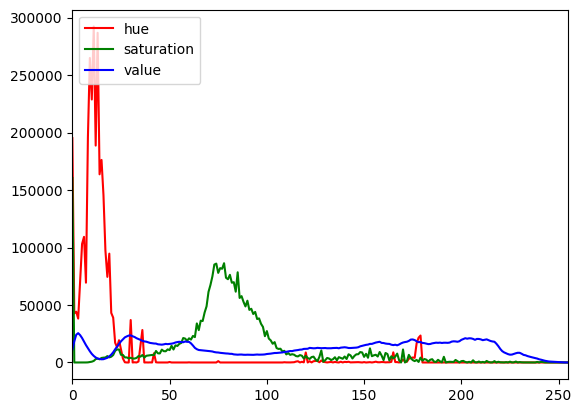

In [375]:
# Create a HSV histogram of the cropped image
img_cropped = cv2.cvtColor(img_cropped, cv2.COLOR_RGB2HSV)

# Hue
hist = cv2.calcHist([img_cropped],[0],None,[256],[0,255])
# Add the histogram to the plot
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img_cropped],[1],None,[256],[0,255])
# Add the histogram to the plot
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img_cropped],[2],None,[256],[0,255])
# Add the histogram to the plot
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot the histogram
plt.show()

In [376]:
# Create two 1D arrays: for minimum hsv values and maximum hsv values
min_hsv = np.uint8([0, 40, 125])
max_hsv = np.uint8([20, 100, 255])

# Use the inRange function to make a mask using the cropped image and the two 1D arrays
mask = cv2.inRange(img_cropped, min_hsv, max_hsv)

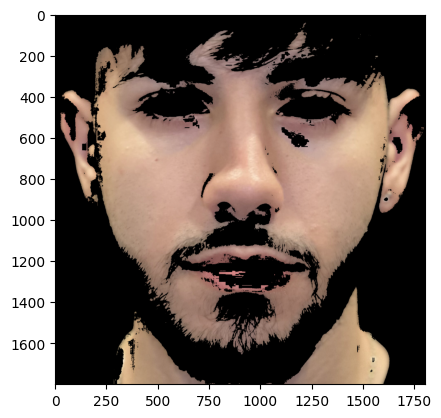

In [377]:
# The bitwise AND operator ( & ) compares each bit of the first operand to the corresponding bit of the second operand.
# If both bits are 1, the corresponding result bit is set to 1. Otherwise, the corresponding result bit is set to 0.
# First image to compare. Second image to compare. Mask to use.
img_masked = cv2.bitwise_and(img_cropped, img_cropped, mask = mask)

# Convert back to RGB from HSV
img_masked = cv2.cvtColor(img_masked, cv2.COLOR_HSV2RGB)

# Plot the masked image
plt.imshow(img_masked)